<a href="https://colab.research.google.com/github/akshaypat444/tensorflow_practice/blob/main/02_Neural_Networks_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

1. Docstring Shortcut - Shift + Cmd + Space

## Input Shape for Images Classification

1. Batch Size (32 is very common batch size)
2. Width
3. Height
4. Color Channels

## Activation function

1. For binary classification - Sigmoid
2. For multiclass classfication - SoftMax
3. Usually in dense layers - ReLU

## Loss Function

1. Binary CrossEntropy
2. Multiclass CrossEntropy

## Create Data for Binary classification 1/0

In [22]:
## Create 1000 examples
n_samples = 1000


# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [4]:
circles = pd.DataFrame({"X0": X[:, 0], "X1":X[:, 1], "label": y })
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


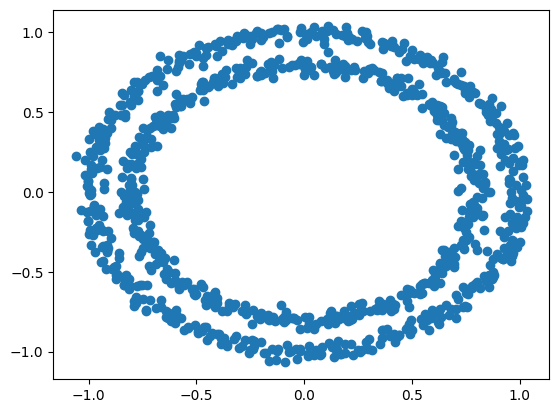

In [5]:
plt.scatter(X[:, 0], X[:, 1])

## Input and Output Shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Model 1



In [8]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                    optimizer=tf.keras.optimizers.SGD(),
                                    metrics="accuracy")

# Fit the model
circle_classification_model_1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.6051 - accuracy: 0.4710
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9495 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 1.5877 - accuracy: 0.5010
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7295 - accuracy: 0.5030
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.4950
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4950
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5010
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5030
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4650
Epoch 11/

In [ ]:
circle_classification_model_1.evaluate(X, y)

32/32 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

## Model 2

Trying to make model a bit more complex by adding extra hidden layer since it's accuracy is only 50%

In [ ]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                    optimizer=tf.keras.optimizers.SGD(),
                                    metrics="accuracy")

# Fit the model
circle_classification_model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
circle_classification_model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932715177536011, 0.5]

## Model 3 - Improvement

Common ways to improve the model

1. Adding more hidden layers
2. Increase the number of hidden units
3. Change the activation function
4. Change the optimzation function
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer

In [ ]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                    optimizer=tf.keras.optimizers.Adam(),
                                    metrics="accuracy")

# Fit the model
circle_classification_model_3.fit(X, y, epochs=100, verbose=0)

In [13]:
circle_classification_model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5090


[0.6958750486373901, 0.5090000033378601]

### Accuracy is still the same even with 2 hidden units and more neurons added with Adam optimizer. Model isn't learning at all. What's happening? ###

In [ ]:
y_preds = circle_classification_model_3.predict(X)

32/32 [==============================] - 0s 2ms/step


In [2]:
def plot_decision_boundary(model, X, y):
  """ Plot decision boundary created by model predicting on X
  """
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.xlim(yy.min(), yy.max())


313/313 [==============================] - 1s 2ms/step
Doing binary classification


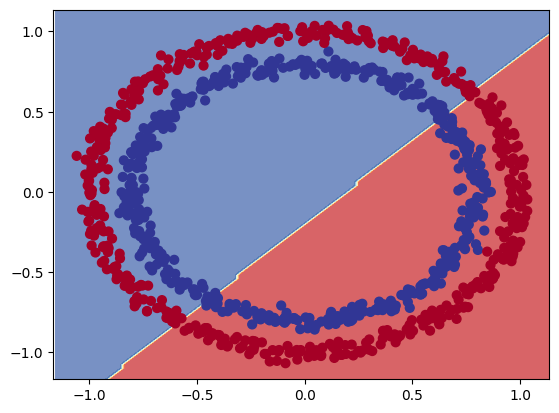

In [ ]:
plot_decision_boundary(model=circle_classification_model_3, X=X, y=y)

In [ ]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

circle_classification_model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

## Binary classfication model will not work for regression problem.

In [18]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_4.compile(loss=tf.keras.losses.mae,
                                    optimizer=tf.keras.optimizers.Adam(),
                                    metrics="mae")

# Fit the model on regression data
circle_classification_model_4.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 459.1947 - mae: 459.1947
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 372.9595 - mae: 372.9595
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 289.6371 - mae: 289.6371
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 202.1840 - mae: 202.1840
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 109.4387 - mae: 109.4387
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 49.2541 - mae: 49.2541
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 73.7625 - mae: 73.7625
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 65.2655 - mae: 65.2655
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 45.9040 - mae: 45.9040
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 48.6495 - mae: 48.6495
Epoch 11/100
5/5 [==============================]

In [19]:
circle_classification_model_4.evaluate(X_reg_test, y_reg_test)

2/2 [==============================] - 0s 8ms/step - loss: 61.4357 - mae: 61.4357


[61.435699462890625, 61.435699462890625]

In [20]:
y_reg_preds = circle_classification_model_4.predict(X_reg_test)

2/2 [==============================] - 0s 6ms/step


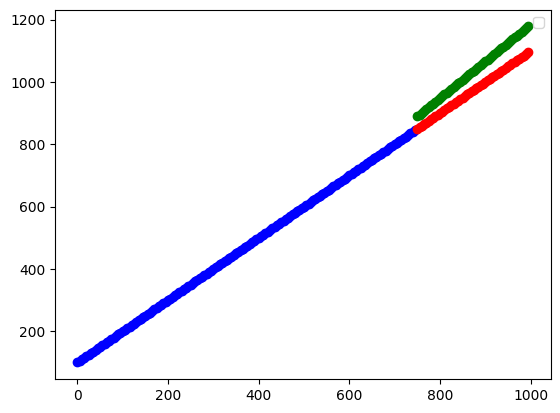

In [21]:
plt.scatter(X_reg_train, y_reg_train, c="b")
plt.scatter(X_reg_test, y_reg_test, c="r")
plt.scatter(X_reg_test, y_reg_preds, c="g")
plt.legend();

In [22]:
tf.random.set_seed(42)

# Create a Model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history_model_4 = model_4.fit(X, y, epochs=100, verbose=0)

In [23]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 4.3196 - accuracy: 0.4730


[4.319617748260498, 0.4729999899864197]

313/313 [==============================] - 0s 1ms/step
Doing binary classification


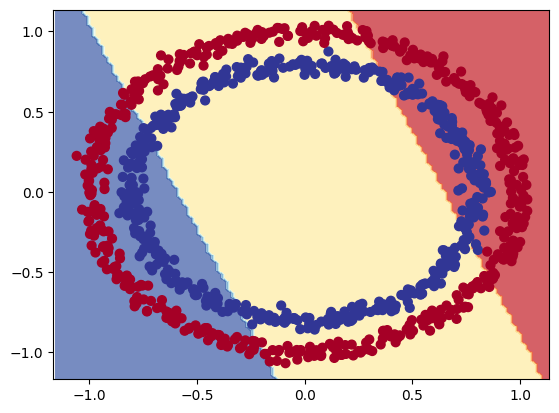

In [24]:
plot_decision_boundary(model_4, X, y)

## Model 5 - Introducing Non-Linearity

In [41]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="relu"),
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 3ms/step - loss: 7.0816 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 11/

In [42]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

313/313 [==============================] - 1s 1ms/step
Doing binary classification


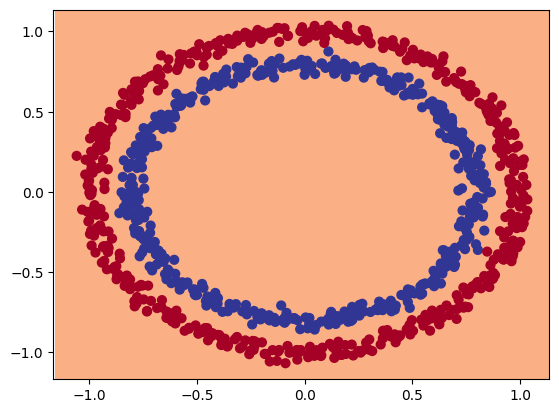

In [43]:
plot_decision_boundary(model_5, X, y)

## Model 6

In [50]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit the model
history = model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 2s 4ms/step - loss: 0.6939 - accuracy: 0.5080
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5170
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5330
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.5640
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.5700
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6637 - accuracy: 0.5670
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6399 - accuracy: 0.6720
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7120
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.7560
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.8190
Epoch 11/

In [51]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9920


[0.03343204781413078, 0.9919999837875366]

In [26]:
plot_decision_boundary(model_6, X, y)

NameError: ignored

## This model gave 99% accuracy and decision boundry fits perfectly. But we don't have the actual testing data for evaluating the model.

In [53]:
print("DONE")

DONE


In [3]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

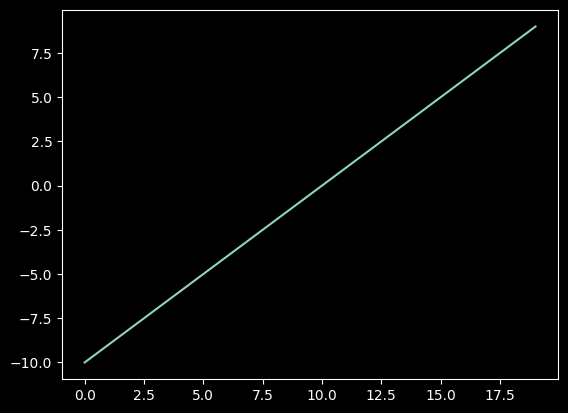

In [7]:
# Visualize our toy tensor
plt.style.use('dark_background')
plt.plot(A)

## Sigmoid activation function

In [19]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [10]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

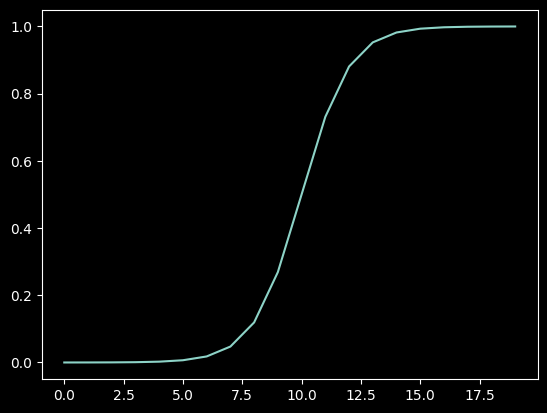

In [12]:
plt.plot(sigmoid(A))

## Relu activation function

In [15]:
def relu(x):
 return tf.maximum(0, x)

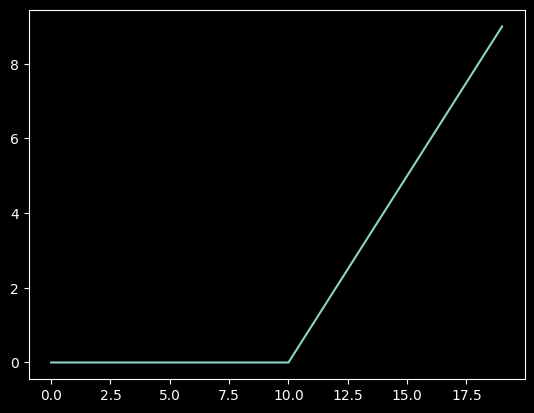

In [16]:
plt.plot(relu(A))

In [17]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

## Evaluating and improving classification model using test data

In [23]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [41]:
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_7.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 4ms/step - loss: 0.6867 - accuracy: 0.5475
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.5925
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6087
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.6662
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6226 - accuracy: 0.7200
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.5916 - accuracy: 0.7312
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.5507 - accuracy: 0.7812
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 0.5163 - accuracy: 0.8075
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.8338
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8675
Epoch 11/50
25/25 [

In [36]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9800


[0.06786489486694336, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 931us/step
Doing binary classification


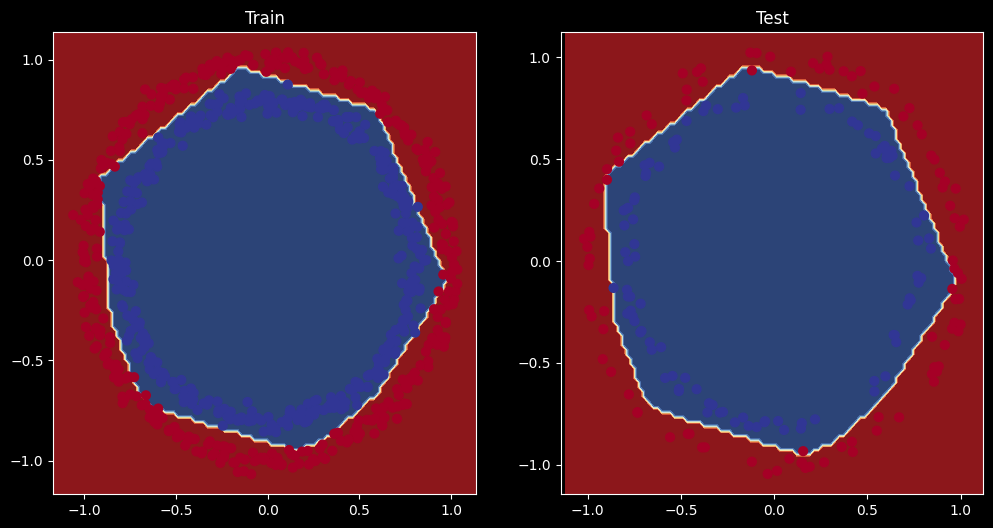

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7, X_test, y_test)

## Plot the model learning graph

Text(0.5, 0, 'epochs')

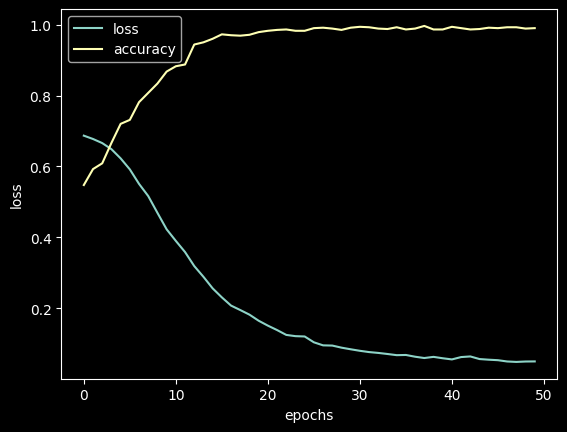

In [42]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Finding the best learning rate -> Learning rate callback

In [46]:
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_9 = model_8.fit(X_train, y_train, epochs=100, callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6982 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.4938 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

Text(0.5, 0, 'epochs')

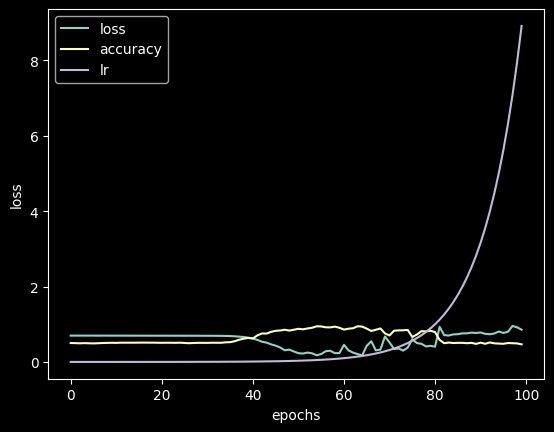

In [50]:
pd.DataFrame(history_9.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Ideal learning rates -> 1, 0.1, 0.01, 0.001, 0.0001

In [59]:
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.04),
                metrics=["accuracy"])



# Fit the model
history_10 = model_9.fit(X_train, y_train, epochs=60)

Epoch 1/60
25/25 [==============================] - 1s 2ms/step - loss: 0.6999 - accuracy: 0.4787
Epoch 2/60
25/25 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5487
Epoch 3/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.6275
Epoch 4/60
25/25 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7225
Epoch 5/60
25/25 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.7763
Epoch 6/60
25/25 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.8075
Epoch 7/60
25/25 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8375
Epoch 8/60
25/25 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.8475
Epoch 9/60
25/25 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.8562
Epoch 10/60
25/25 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8575
Epoch 11/60
25/25 [

In [60]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0734 - accuracy: 0.9800


[0.07341571897268295, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


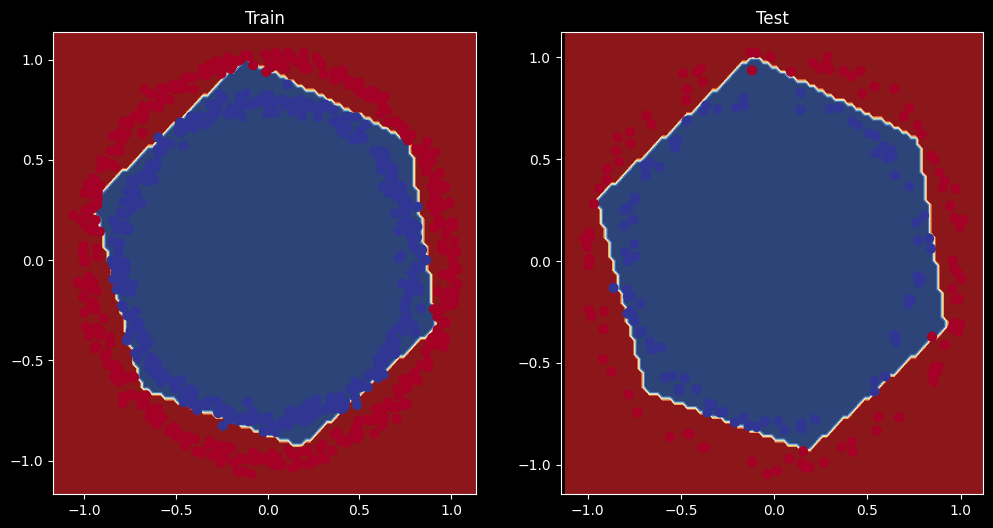

In [61]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9, X_test, y_test)

## More classification evaluation methods